# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency


In [16]:
df = pd.read_csv('previsao_de_renda.csv')
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [17]:
df_quali = df[['posse_de_veiculo', 'posse_de_imovel', 'renda']]

In [8]:

# Criar faixas de renda (ajuste conforme necessário)
df_quali['faixa_renda'] = pd.cut(df_quali['renda'], 
                                 bins=[0, 2000, 5000, 10000, 20000, df_quali['renda'].max()], 
                                 labels=['Até 2K', '2K-5K', '5K-10K', '10K-20K', '20K+'])

# Convertendo booleanos para string para evitar erros
df_quali[['posse_de_veiculo', 'posse_de_imovel']] = df_quali[['posse_de_veiculo', 'posse_de_imovel']].astype(str)

C:\Users\alima\AppData\Local\Temp\ipykernel_21020\1416740387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quali['faixa_renda'] = pd.cut(df_quali['renda'],
C:\Users\alima\AppData\Local\Temp\ipykernel_21020\1416740387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quali[['posse_de_veiculo', 'posse_de_imovel']] = df_quali[['posse_de_veiculo', 'posse_de_imovel']].astype(str)


C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
No artists with labels found to put in legend.  Note that arti

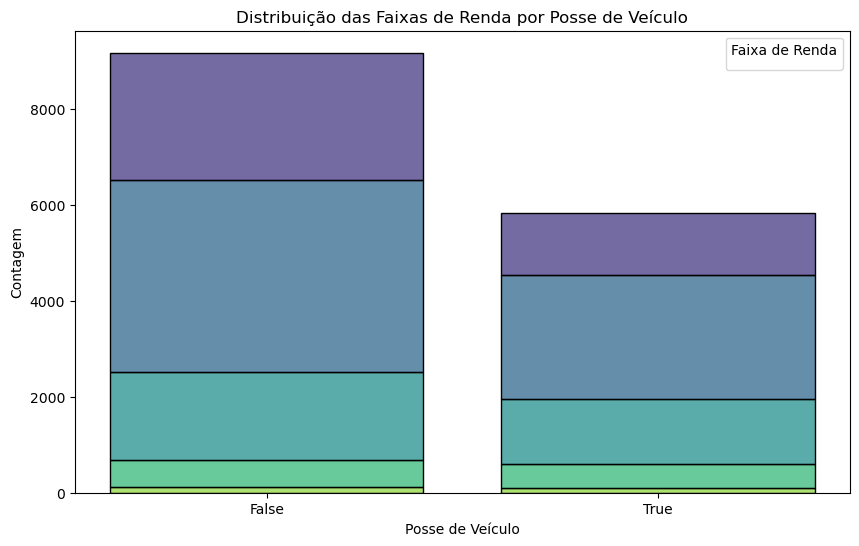

In [9]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_quali, x='posse_de_veiculo', hue='faixa_renda', multiple='stack', palette="viridis", shrink=0.8)

plt.title('Distribuição das Faixas de Renda por Posse de Veículo')
plt.xlabel('Posse de Veículo')
plt.ylabel('Contagem')
plt.legend(title="Faixa de Renda")
plt.show()

C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
No artists with labels found to put in legend.  Note that arti

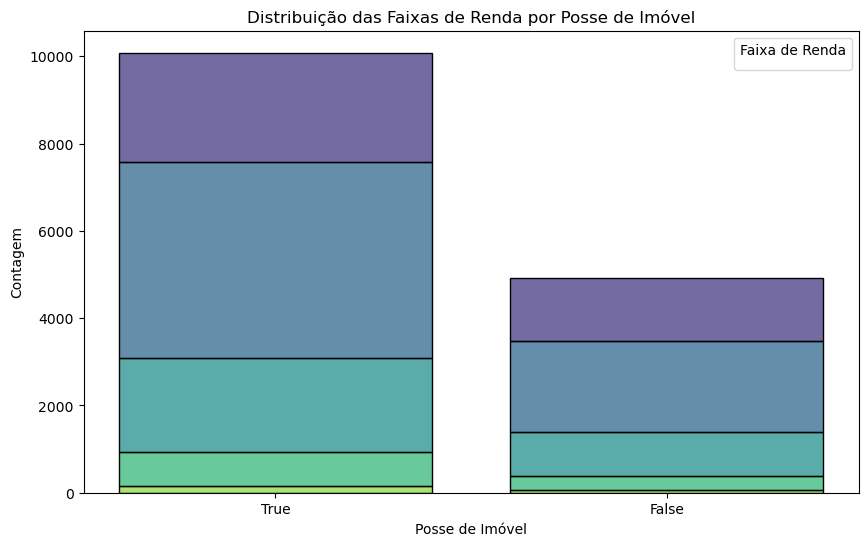

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_quali, x='posse_de_imovel', hue='faixa_renda', multiple='stack', palette="viridis", shrink=0.8)

plt.title('Distribuição das Faixas de Renda por Posse de Imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Contagem')
plt.legend(title="Faixa de Renda")
plt.show()

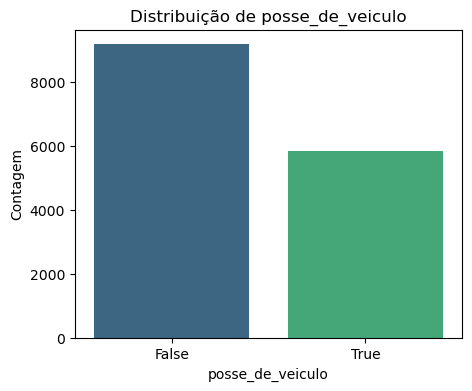

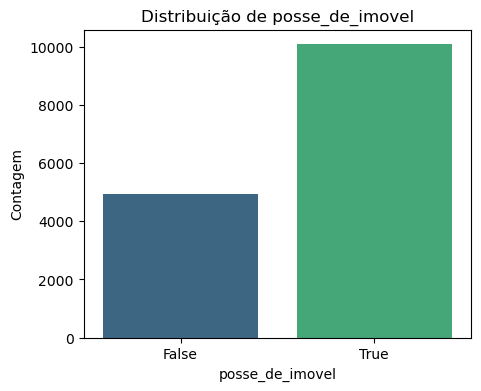

In [13]:
# visualizar a distribuição de cada variável individualmente:
for coluna in df_quali.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x=df_quali[coluna], palette="viridis")
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.show()


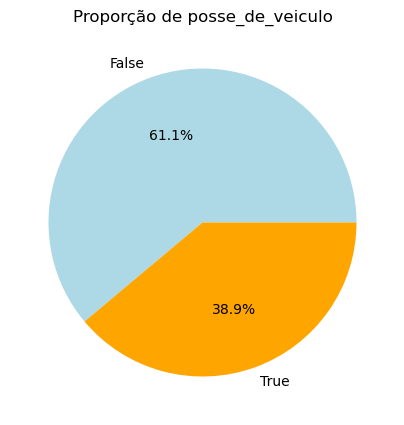

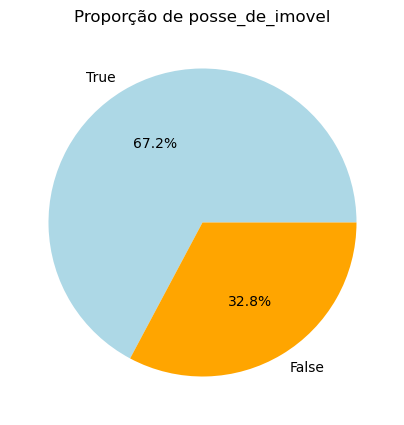

In [20]:
# destaca a proporção entre True e False.
colunas = 'posse_de_veiculo', 'posse_de_imovel'
for coluna in colunas:
    plt.figure(figsize=(5,5))
    df_quali[coluna].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
    plt.title(f'Proporção de {coluna}')
    plt.ylabel('')
    plt.show()


In [26]:
# Tabela de contingência 
tabela = pd.crosstab(df_quali['posse_de_veiculo'], df_quali['posse_de_imovel'])
print(tabela)

posse_de_imovel   False  True 
posse_de_veiculo              
False              2955   6212
True               1963   3870


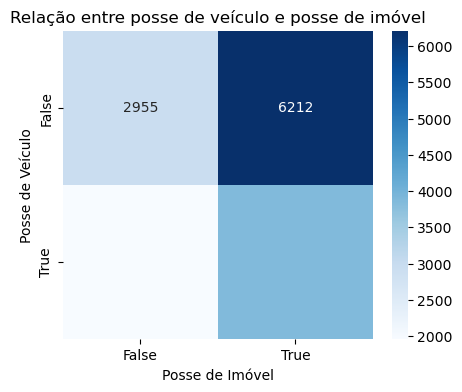

In [25]:
# Heatmap da tabela de contingência:

plt.figure(figsize=(5,4))
sns.heatmap(tabela, annot=True, cmap='Blues', fmt='d')
plt.title('Relação entre posse de veículo e posse de imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Posse de Veículo')
plt.show()


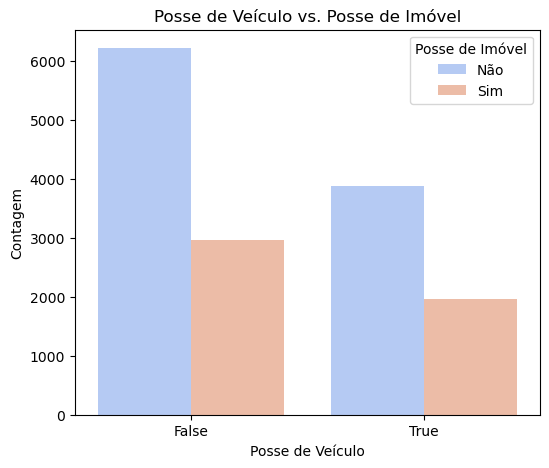

In [28]:
# Convertendo booleanos para strings
df_quali_plot = df_quali.astype(str)

# ráfico de barras agrupado, compara as categorias lado a lado.



plt.figure(figsize=(6,5))
sns.countplot(x='posse_de_veiculo', hue='posse_de_imovel', data=df_quali_plot, palette='coolwarm')
plt.title('Posse de Veículo vs. Posse de Imóvel')
plt.xlabel('Posse de Veículo')
plt.ylabel('Contagem')
plt.legend(title='Posse de Imóvel', labels=['Não', 'Sim'])
plt.show()

In [24]:
# função para calculo de Coeficiente de correlação de Cramér’s V
def cramers_v(x, y):
    tabela = pd.crosstab(x, y)
    chi2 = chi2_contingency(tabela)[0]
    n = tabela.sum().sum()
    phi2 = chi2 / n
    r, k = tabela.shape
    return np.sqrt(phi2 / min(r-1, k-1))

cramers_v(df_quali['posse_de_veiculo'], df_quali['posse_de_imovel'])


0.01458144358583556

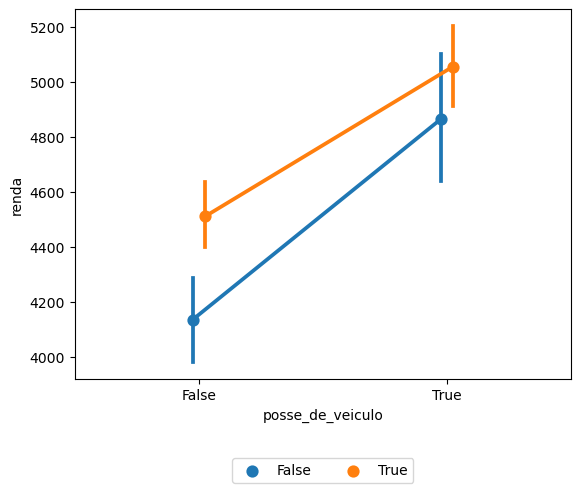

In [33]:
ex = sns.pointplot(x='posse_de_veiculo', y='renda', hue='posse_de_imovel',
                 data=df_quali, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

### Com Base nas visualizações dos gráficos gerados, é possível notar que pessoas com renda maior tende a priorizar a posse do imóvel, embora a diferença entre ambras não seja grande o sufuciente para descartar a variável 'posse_de_veiculo'